## Import Modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import time 
import matplotlib.pyplot as plt
import os
from pathlib import Path
from wordcloud import WordCloud
from langdetect import detect, DetectorFactory

In [2]:
import import_ipynb
import capstone_functions_04
from capstone_functions_04 import save_plot_function, target_distribution_barplot, is_english

# EDA

## Load Dataset

In [7]:
# load dataset
job_df = pd.read_csv('../data/fake_job_postings.csv')

# check the first 5 rows
job_df.head()
print(f'First 5 rows:\n{job_df.head()}')

# check the last 5 rows
job_df.tail()
print(f'Last 5 rows:\n{job_df.tail()}')

# View dataset info: dtypes, non_null counts
job_df.info()
print(job_df.info())

# check dataset shape
job_df.shape
print(f'Shape of dataset:\n{job_df.shape}')

# list column names
job_df.columns
print(f'Column names:\n{job_df.columns}')

# View summary of numerical features
job_df.describe()
print(f'Summary statistics for numerical columns:\n{job_df.describe()}')

First 5 rows:
   job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2        NaN          NaN  Valor Services provides Workforce Solutions th...   
3      Sales          NaN  Our passion for improving quality of life thro...   
4        NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   

                                         descrip

In [8]:
job_df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [11]:
# check the first 5 rows
job_df.head()
print(f'First 5 rows:\n{job_df.head()}')

First 5 rows:
   job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2        NaN          NaN  Valor Services provides Workforce Solutions th...   
3      Sales          NaN  Our passion for improving quality of life thro...   
4        NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   

                                         descrip

In [13]:
# check the last 5 rows
job_df.tail()
print(f'Last 5 rows:\n{job_df.tail()}')

Last 5 rows:
       job_id                                              title  \
17875   17876                   Account Director - Distribution    
17876   17877                                 Payroll Accountant   
17877   17878  Project Cost Control Staff Engineer - Cost Con...   
17878   17879                                   Graphic Designer   
17879   17880                         Web Application Developers   

                   location   department salary_range  \
17875       CA, ON, Toronto        Sales          NaN   
17876  US, PA, Philadelphia   Accounting          NaN   
17877       US, TX, Houston          NaN          NaN   
17878         NG, LA, Lagos          NaN          NaN   
17879     NZ, N, Wellington  Engineering          NaN   

                                         company_profile  \
17875  Vend is looking for some awesome new talent to...   
17876  WebLinc is the e-commerce platform and service...   
17877  We Provide Full Time Permanent Positions for m..

In [15]:
# View dataset info: dtypes, non_null counts
job_df.info()
print(job_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [17]:
# check dataset shape
job_df.shape
print(f'Shape of dataset:\n{job_df.shape}')

Shape of dataset:
(17880, 18)


In [19]:
# list column names
job_df.columns
print(f'Column names:\n{job_df.columns}')

Column names:
Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')


In [21]:
# View summary of numerical features
job_df.describe()
print(f'Summary statistics for numerical columns:\n{job_df.describe()}')

Summary statistics for numerical columns:
             job_id  telecommuting  has_company_logo  has_questions  \
count  17880.000000   17880.000000      17880.000000   17880.000000   
mean    8940.500000       0.042897          0.795302       0.491723   
std     5161.655742       0.202631          0.403492       0.499945   
min        1.000000       0.000000          0.000000       0.000000   
25%     4470.750000       0.000000          1.000000       0.000000   
50%     8940.500000       0.000000          1.000000       0.000000   
75%    13410.250000       0.000000          1.000000       1.000000   
max    17880.000000       1.000000          1.000000       1.000000   

         fraudulent  
count  17880.000000  
mean       0.048434  
std        0.214688  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  


## Data Preparation

In [24]:
# Check dataset for duplicates
job_df.duplicated().sum()
print(f'Number of duplicated rows : {job_df.duplicated().sum()}')

# Check 'title' column for duplicates
job_df.duplicated('title')
print(f'Duplicate rows in title:\n{job_df.duplicated('title')}')

# Check duplicate rows for 'title' 
job_df.loc[job_df.duplicated(subset=['title'])].head()
print(f'Title duplicates:\n{job_df.loc[job_df.duplicated(subset=['title'])].head()}')

# Checking an example of duplicates for "English Teacher Abroad"
job_df.query('title == "English Teacher Abroad"')
print(f'English Teacher Abroad duplicates:\n{job_df.query('title == "English Teacher Abroad"')}')

# Checking an example of duplicates for "Customer Service"
job_df.query('title == "Customer Service Associate"')
print(f'Customer Service Associate duplicates:\n{job_df.query('title == "Customer Service Associate"')}')

# handling missing values
job_df.isna().sum()
print(f'Total NaN values for each column:\n{job_df.isna().sum()}')

# columns with missing values
missing_values = job_df.isna().sum()
print(f'Columns with NaN values:\n{missing_values[missing_values > 0]}')

# number of columns with missing values
len(missing_values[missing_values > 0])
print(f'Number of columns with missing values:\n{len(missing_values[missing_values > 0])}')

# visualise the missing values
missing_values = (missing_values / len(job_df)) * 100
print(f'Missing values %:\n{missing_values}')

# plot missing values
missing_percent = missing_values[missing_values > 0].sort_values(ascending=False)

Number of duplicated rows : 0
Duplicate rows in title:
0        False
1        False
2        False
3        False
4        False
         ...  
17875    False
17876     True
17877    False
17878     True
17879     True
Length: 17880, dtype: bool
Title duplicates:
    job_id                                    title            location  \
40      41                  English Teacher Abroad     US, PA, Kutztown   
41      42                  English Teacher Abroad   US, CA, Sacramento   
47      48              Customer Service Associate    US, TN, Brentwood   
48      49                  English Teacher Abroad         US, OH, Kent   
72      73  Customer Service Associate - Part Time   US, FL, Plantation   

   department salary_range                                    company_profile  \
40        NaN          NaN  We help teachers get safe &amp; secure jobs ab...   
41        NaN          NaN  We help teachers get safe &amp; secure jobs ab...   
47        NaN          NaN  Novitex Enter

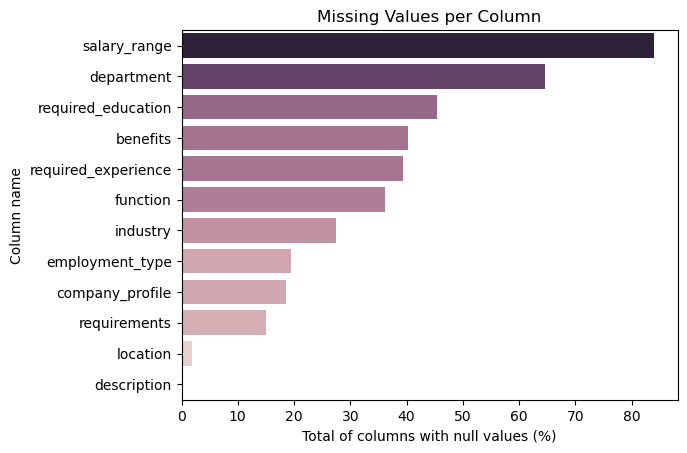

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image001.png


In [26]:
# barplot
sns.barplot(x=missing_percent, y=missing_percent.index,
            hue=missing_percent, legend=False)
# set title and axis
plt.xlabel('Total of columns with null values (%)')
plt.ylabel('Column name')
plt.title('Missing Values per Column')
save_plot_function(1)

Although there are duplicates the location for these jobs are different
* The company needs 'English Teacher Abroad' for the various locations throughout

Two thirds of the dataset have missing values
* location and description have significantly less NaN values
* salary_range and department have over half NaN values
* dropping salary_range could be appropriate as trying to impute the values with only 20%
* check the missing value for description and see if it's unique or could be imputed through other related rows

## Missing Data

In [30]:
job_df['benefits'].value_counts()

benefits
See job description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         726
Career prospects.                                                                                                                                                                                                                                                                              

In [32]:
# fill the missing values where appropriate
job_df.dtypes
print(f'Data types:\n{job_df.dtypes}')

# show total of each data type  
job_df.dtypes.value_counts()
print(f'Total number of each data type:\n{job_df.dtypes.value_counts()}')

# create text_cols for textual data
text_cols = ['title', 'company_profile', 'description', 'requirements', 'benefits']

# replace missing values in text_cols with 'Unknown'
job_df[text_cols] = job_df[text_cols].fillna('Unknown')

# confirm text_cols missing values are 0
print(f'Columns with missing values:\n{job_df.isna().sum()}')

# fill the rest of the missing values appropriately
job_df['location'] = job_df['location'].fillna('Unknown')
job_df['department'] = job_df['department'].fillna('Unknown')
# job_df['location'] = job_df['location'].fillna('Unknown')
job_df['salary_range'] = job_df['salary_range'].fillna('Unknown')
job_df['employment_type'] = job_df['employment_type'].fillna('Other')
job_df['required_experience'] = job_df['required_experience'].fillna('Not Applicable')
job_df['required_education'] = job_df['required_education'].fillna('Unspecified')
job_df['industry'] = job_df['industry'].fillna('Unknown')
job_df['function'] = job_df['function'].fillna('Unknown')

# confirm whole dataset missing values are 0
print(f'All NaNs have been resolved:\n{job_df.isna().sum()}')

Data types:
job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object
Total number of each data type:
object    13
int64      5
Name: count, dtype: int64
Columns with missing values:
job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile            0
description                0
requirements               0
benefits                   0
telecommuting              0
has_company_logo           0
ha

### Confidence intervals
* Mean values of fraudulent job postings per employment type
* Narrow lines suggest more certainty
* Wider lines mean less certainty
* Highlight variability between categories

In [35]:
job_df['required_education'].value_counts()

required_education
Unspecified                          9502
Bachelor's Degree                    5145
High School or equivalent            2080
Master's Degree                       416
Associate Degree                      274
Certification                         170
Some College Coursework Completed     102
Professional                           74
Vocational                             49
Some High School Coursework            27
Doctorate                              26
Vocational - HS Diploma                 9
Vocational - Degree                     6
Name: count, dtype: int64

## Feature Analysis

Target variable distribution:
fraudulent
0    17014
1      866
Name: count, dtype: int64
Total number of job postings: 17880
Percentage of real vs fraudulent jobs:
fraudulent
0    95.16
1     4.84
Name: proportion, dtype: float64


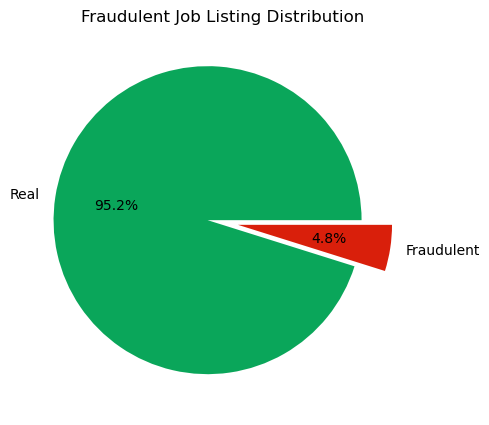

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image002.png


In [38]:
# feature analysis 

# value counts of target variable
job_df['fraudulent'].value_counts()
print(f'Target variable distribution:\n{job_df['fraudulent'].value_counts()}')

# total number of job postings
total_listings = len(job_df)
print(f'Total number of job postings: {total_listings}')

# calculate percentage of real vs fraudulent jos
fraudulent_percentage =job_df['fraudulent'].value_counts(normalize=True) * 100
fraudulent_percentage = fraudulent_percentage.round(2)
print(f'Percentage of real vs fraudulent jobs:\n{fraudulent_percentage}')

# create pie chart and bar chart to show distribution of target variable 
# subset job_df for pie chart 
fraud_df = job_df['fraudulent'].value_counts()

explode = [0.1] * len(fraud_df)
labels = ['Real', 'Fraudulent']

fraud_df.plot.pie(labels=labels,
                  autopct='%1.1f%%',
                  figsize=(5, 5), 
                  startangle=0,
                  colors=['#0aa65a', '#d91f0b'],
                  explode=explode,
                  title='Fraudulent Job Listing Distribution')
# remove count y label
plt.ylabel('')

save_plot_function(2)

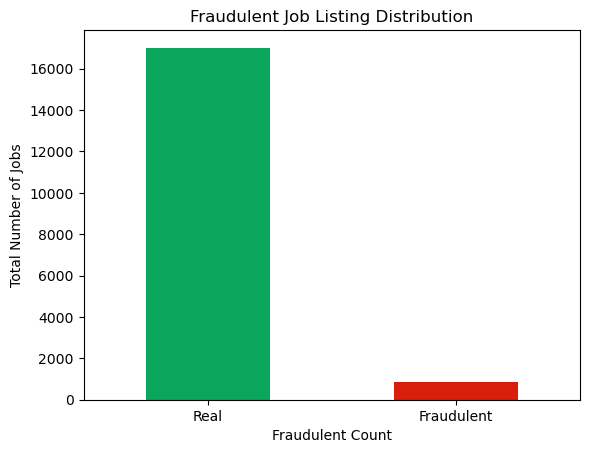

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image003.png


In [40]:
# bar chart visualisation 

ax = fraud_df.plot(kind='bar', 
                   color=['#0aa65a', '#d91f0b'])

plt.title('Fraudulent Job Listing Distribution')
plt.xlabel('Fraudulent Count')
plt.ylabel('Total Number of Jobs')
plt.xticks(ticks=[0, 1], labels=labels, rotation=0)

save_plot_function(3)

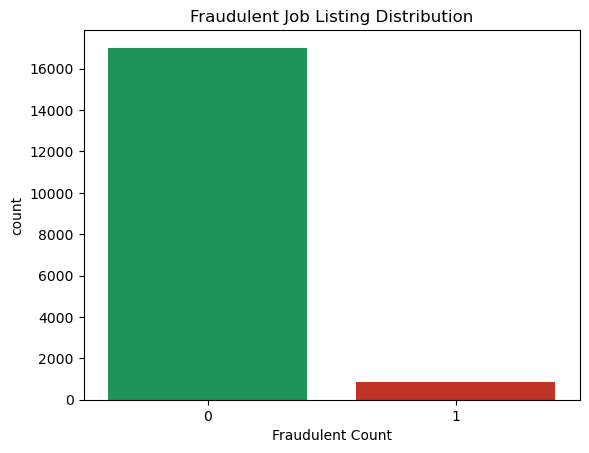

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image004.png


In [42]:
# countplot visualisation

sns.countplot(data=job_df, 
              x='fraudulent',
              hue='fraudulent',
              legend=False,
              palette=['#0aa65a', '#d91f0b'])
plt.xlabel('Fraudulent Count')
plt.title('Fraudulent Job Listing Distribution')
save_plot_function(4)

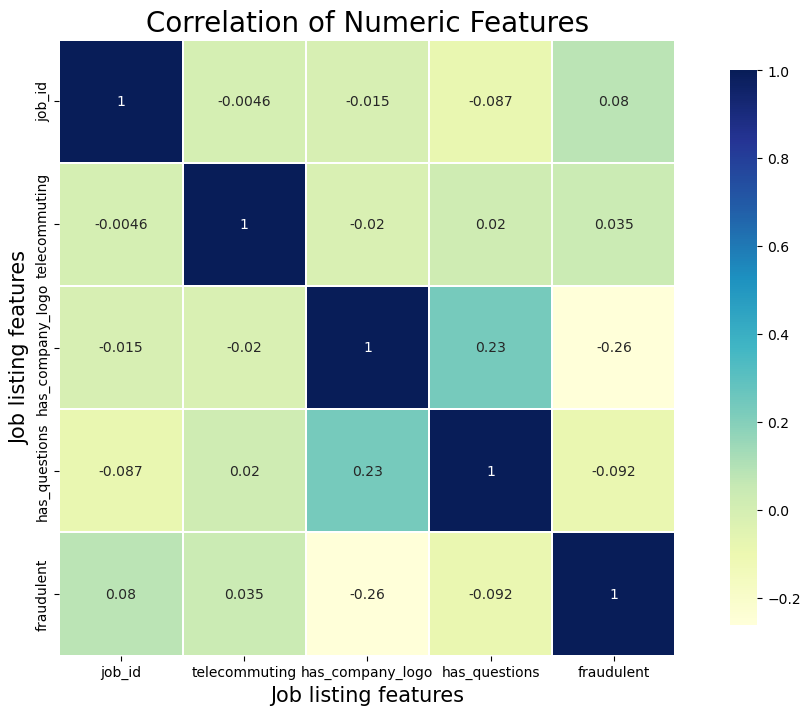

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image005.png


In [44]:
# Correlation plot

numeric_df = job_df.select_dtypes(np.number)
corr_df = numeric_df.corr()

# Figure and axis
f, ax = plt.subplots(figsize=(14,8))
cmap = sns.diverging_palette(10, 2, as_cmap=True)

# Heatmap, used cbar_kws 'shrink' as the colorbar in previous attempts was too large
sns.heatmap(corr_df, 
            cmap ='YlGnBu', 
            square=True, 
            ax=ax, 
            annot=True, 
            linewidth=0.1, 
            cbar_kws={'shrink': 0.9, 'aspect': 20}
)

# Set title and label axis 

plt.title('Correlation of Numeric Features',size=20)
plt.xlabel('Job listing features',size=15)
plt.ylabel('Job listing features',size=15)

save_plot_function(5)

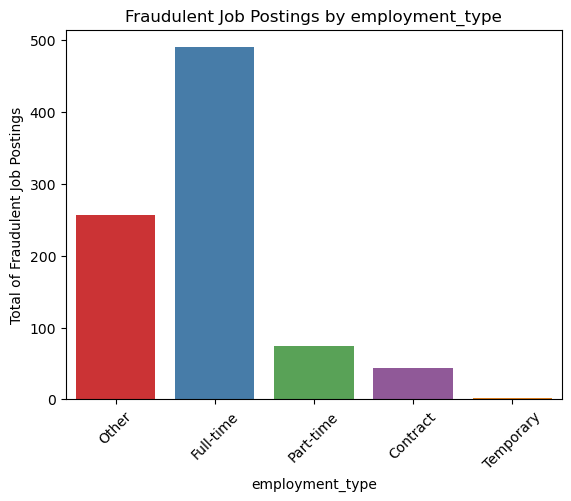

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image006.png


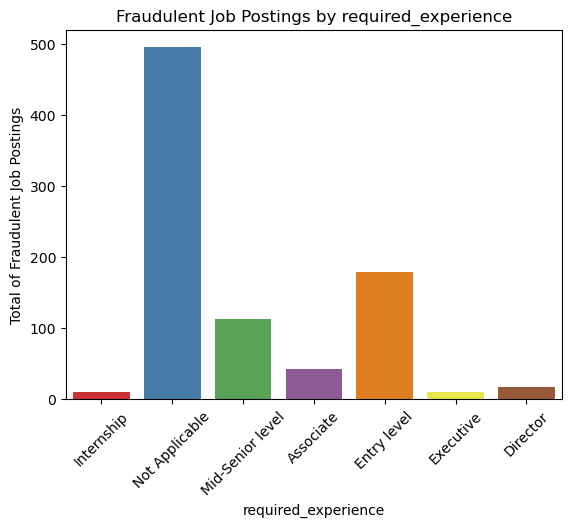

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image007.png


In [46]:
# Use target_distribution function on employment_type & required_experience

# Since there is a 'other' value in employment type, should fillna('other') be suitable?
target_distribution_barplot(job_df, 'employment_type', 'fraudulent', 6)

# since there is a Not Applicable value in required experience would it be useful to use fillna(Not Applicable)?
target_distribution_barplot(job_df, 'required_experience', 'fraudulent', 7)

Location:
0      US, NY, New York
1        NZ, , Auckland
2         US, IA, Wever
3    US, DC, Washington
4    US, FL, Fort Worth
Name: location, dtype: object
Country:
0    US
1    NZ
2    US
3    US
4    US
Name: country, dtype: object


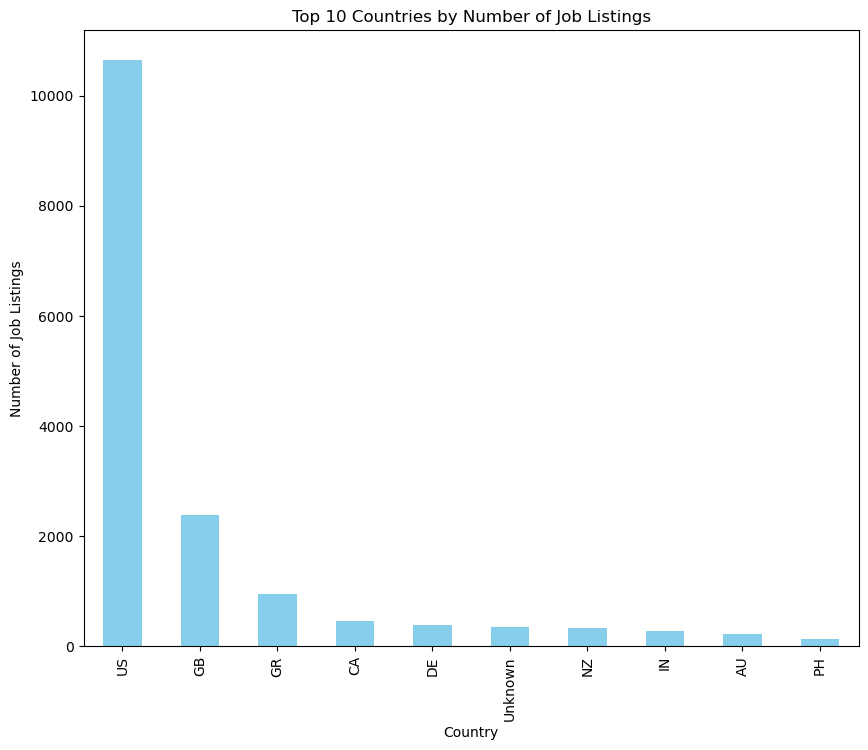

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image008.png


In [48]:
# Fraud rate by location
print(f'Location:\n{job_df['location'].head()}')

# Create split function, to split location to show only the country code
def split(location):
    loca = location.split(',')
    return loca[0]

# Add country column to store the country code
job_df['country'] = job_df.location.apply(split)

# confirm country has been added to the dataset
print(f'Country:\n{job_df['country'].head()}')

# Total number of jobs posted based off of the top 10 countries
top_10_countries = job_df['country'].value_counts().nlargest(10)

# Plot top 10 country
plt.figure(figsize=(10, 8))
top_10_countries.plot(kind='bar', color='skyblue')

# set title and axis labels
plt.title('Top 10 Countries by Number of Job Listings')
plt.xlabel('Country')
plt.ylabel('Number of Job Listings')

save_plot_function(8)

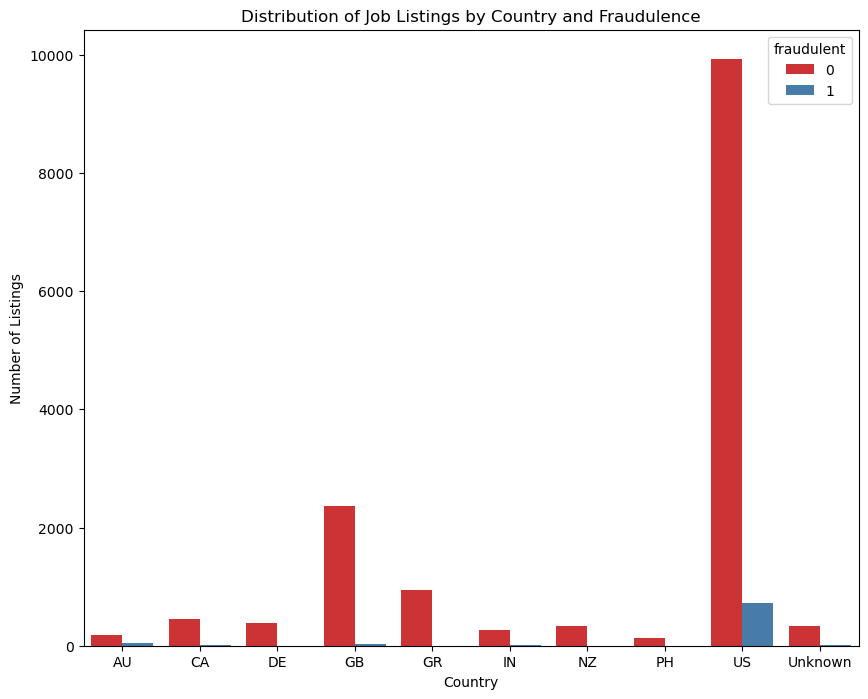

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image009.png


In [50]:
# create multivariate analysis of top 10 countries and fraudulent listings
country_fraud = (
    job_df.groupby(['country', 'fraudulent'])
    .size()
    .reset_index(name='count')
)

top_10_countries = job_df['country'].value_counts().nlargest(10).index.tolist()
filtered_df = country_fraud[country_fraud['country'].apply(lambda x: x in top_10_countries)]

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(data=filtered_df,
            x='country',
            y='count',
            hue='fraudulent',
            palette='Set1')

# set title and axis labels
plt.title('Distribution of Job Listings by Country and Fraudulence')
plt.xlabel('Country')
plt.ylabel('Number of Listings')

save_plot_function(9)

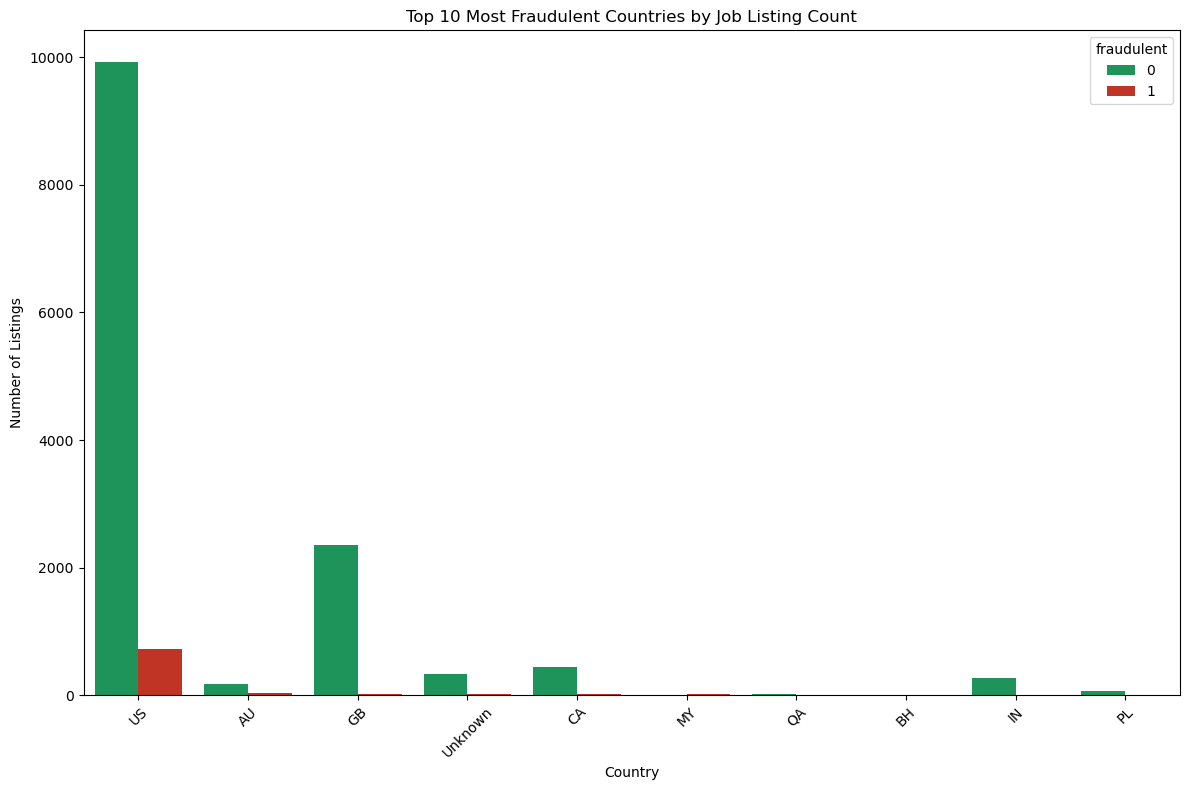

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image018.png


In [98]:
# plot only fraud country
fraud_only = country_fraud[country_fraud['fraudulent'] == 1]

# top 10 fraud countries
top_fraud_countries = fraud_only.sort_values('count', ascending=False).head(10)['country'].tolist()

# filter full dataframe for those countries
filtered_country_df = country_fraud[country_fraud['country'].isin(top_fraud_countries)]

# sort countries in fraudulence order
country_order = fraud_only[fraud_only['country'].isin(top_fraud_countries)].sort_values('count', ascending=False)['country']

# plot 
plt.figure(figsize=(12, 8))
sns.barplot(data=filtered_country_df,
            x='country',
            y='count',
            hue='fraudulent',
            order=country_order,
            palette={0: '#0aa65a', 1: '#d91f0b'})

# Labels and title
plt.title('Top 10 Most Fraudulent Countries by Job Listing Count')
plt.xlabel('Country')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.tight_layout()

save_plot_function(18)

In [100]:
# find total of United states real and fraudulent listings
us_counts = country_fraud[country_fraud['country'] == 'US']

real = us_counts.loc[us_counts['fraudulent'] == 0, 'count'] .item()
fraud = us_counts.loc[us_counts['fraudulent'] == 1, 'count'] .item()

print(f'US real listings (0): {real}')
print(f'US fraudulent listings (1): {fraud}')

US real listings (0): 9926
US fraudulent listings (1): 730


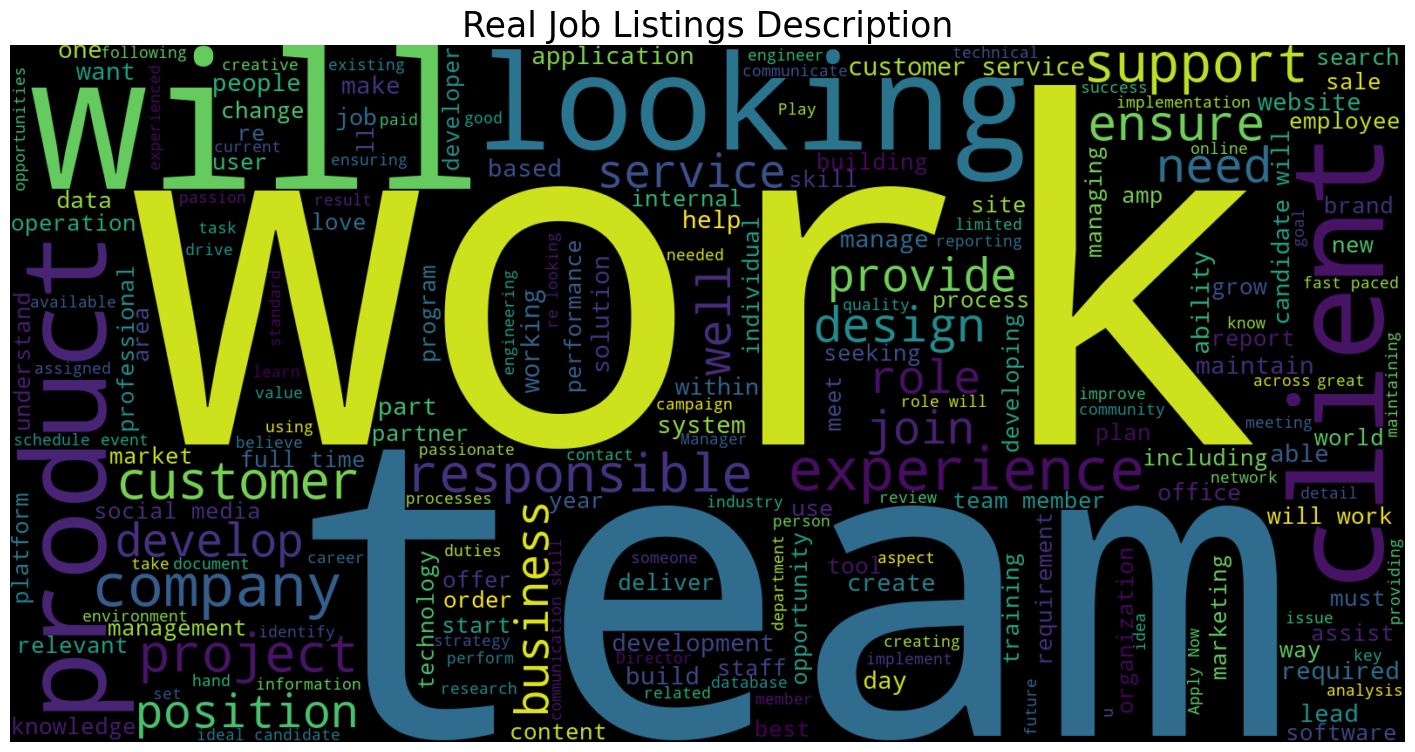

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image010.png


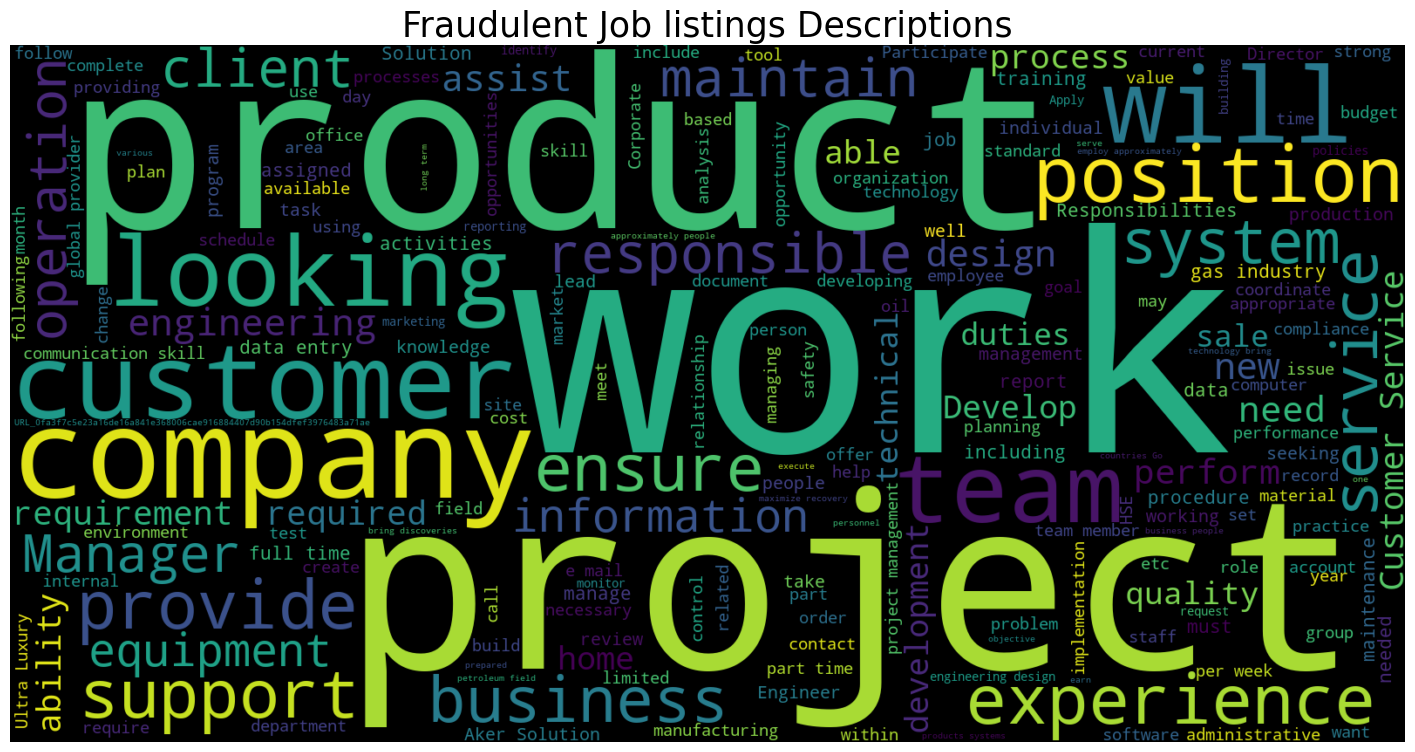

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image011.png


In [53]:
# Create word cloud for real job descriptions
real_desc_text = ' '. join(job_df[job_df['fraudulent']==0]['description'])
wordcloud = WordCloud(width=1600, 
                      height=800, 
                      background_color='black').generate(real_desc_text)

# Plot cloud
plt.figure(figsize=(18, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Real Job Listings Description', size=25)

save_plot_function(10)

# Create word cloud for fraudulent job descriptions 
fraud_desc_text = ' '. join(job_df[job_df['fraudulent']==1]['description'])
wordcloud = WordCloud(width=1600, 
                      height=800, 
                      background_color='black').generate(fraud_desc_text)
# Plot cloud
plt.figure(figsize=(18, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Fraudulent Job listings Descriptions', size=25)

save_plot_function(11)

<Figure size 1700x500 with 0 Axes>

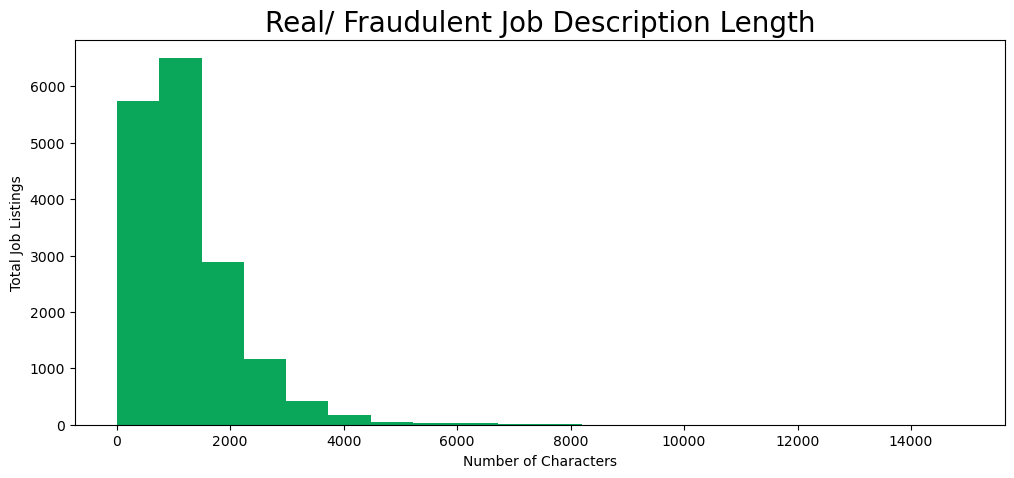

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image012.png


In [55]:
# Visualise the difference in length between real and fraudulent job descriptions
plt.figure(figsize=(17, 5))

# Real job descriptions
plt.figure(figsize=(12, 5))
real_desc_length = job_df[job_df['fraudulent']==0]['description'].str.len()
plt.hist(real_desc_length, bins=20, color='#0aa65a')
plt.title('Real/ Fraudulent Job Description Length', size=20)
plt.xlabel('Number of Characters')
plt.ylabel('Total Job Listings')

save_plot_function(12)

# # Fraudulent job description
# plt.figure(figsize=(12, 5))
# fraud_desc_length = job_df[job_df['fraudulent']==1]['description'].str.len()
# plt.hist(fraud_desc_length, bins=20, color='#d91f0b')
# plt.title('Fraudulent Job Description Length', size=20)
# plt.xlabel('Number of Characters')
# plt.ylabel('Total Job Listings')

# save_plot_function(13)

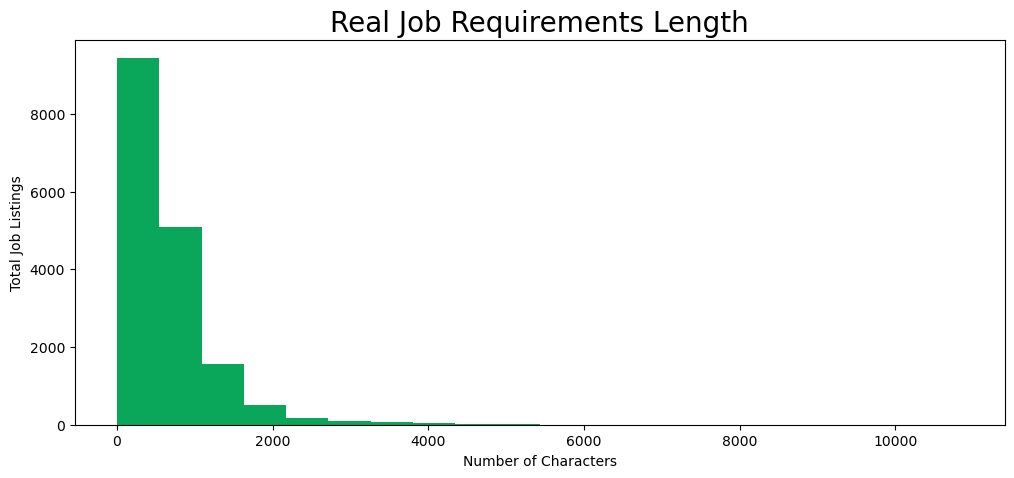

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image014.png


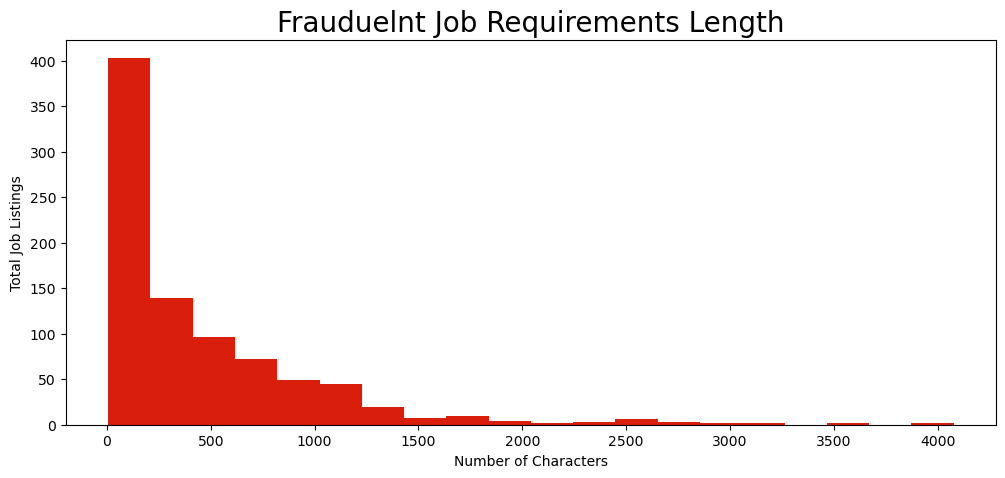

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image015.png


In [56]:
# Visualise length of requirements for real and fraudulent job listings

# real requirements job listings 
plt.figure(figsize=(12, 5))
real_req_length = job_df[job_df['fraudulent']==0]['requirements'].str.len()
plt.hist(real_req_length, bins=20, color='#0aa65a')
plt.title('Real Job Requirements Length', size=20)
plt.xlabel('Number of Characters')
plt.ylabel('Total Job Listings')

save_plot_function(14)

# fraudulent requirements job listings 
plt.figure(figsize=(12, 5))
fraud_req_length = job_df[job_df['fraudulent']==1]['requirements'].str.len()
plt.hist(fraud_req_length, bins=20, color='#d91f0b')
plt.title('Frauduelnt Job Requirements Length', size=20)
plt.xlabel('Number of Characters')
plt.ylabel('Total Job Listings')

save_plot_function(15)

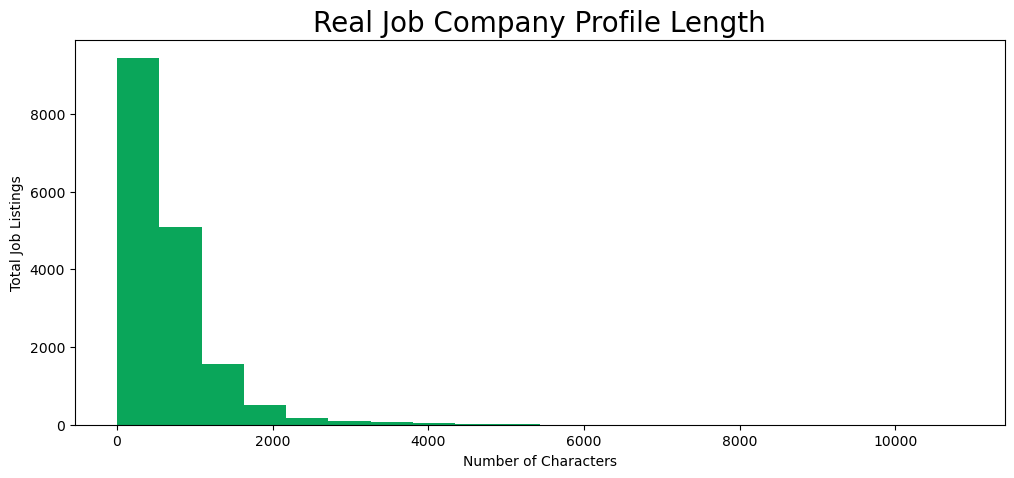

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image016.png


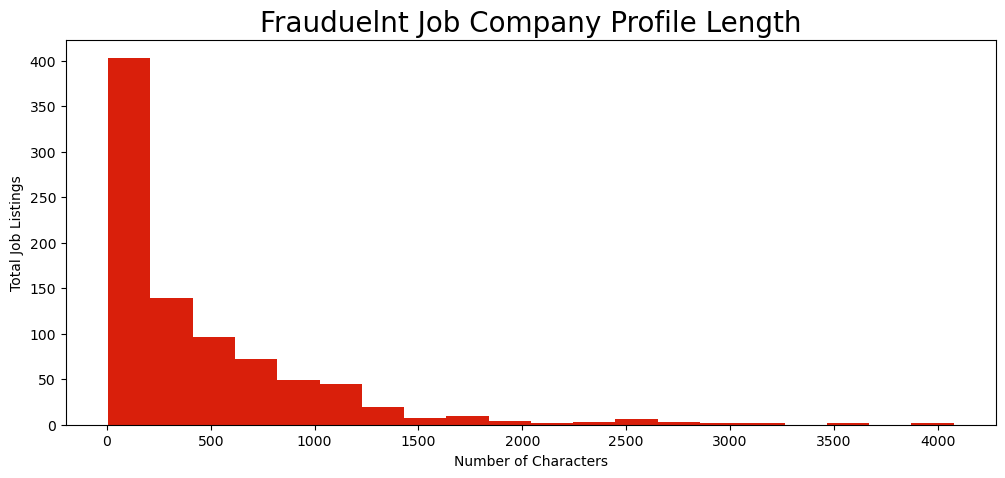

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image017.png


In [57]:
# Visualise length of company profile for real and fraudulent job listings 

# real company profile job listings 
plt.figure(figsize=(12, 5))
real_comp_length = job_df[job_df['fraudulent']==0]['company_profile'].str.len()
plt.hist(real_req_length, bins=20, color='#0aa65a')
plt.title('Real Job Company Profile Length', size=20)
plt.xlabel('Number of Characters')
plt.ylabel('Total Job Listings')

save_plot_function(16)

# fraudulent requirements job listings 
plt.figure(figsize=(12, 5))
fraud_comp_length = job_df[job_df['fraudulent']==1]['company_profile'].str.len()
plt.hist(fraud_req_length, bins=20, color='#d91f0b')
plt.title('Frauduelnt Job Company Profile Length', size=20)
plt.xlabel('Number of Characters')
plt.ylabel('Total Job Listings')

save_plot_function(17)

In [58]:
# # feature analysis 

# # value counts of target variable
# job_df['fraudulent'].value_counts()
# print(f'Target variable distribution:\n{job_df['fraudulent'].value_counts()}')

# # total number of job postings
# total_listings = len(job_df)
# print(f'Total number of job postings: {total_listings}')

# # calculate percentage of real vs fraudulent jos
# fraudulent_percentage =job_df['fraudulent'].value_counts(normalize=True) * 100
# fraudulent_percentage = fraudulent_percentage.round(2)
# print(f'Percentage of real vs fraudulent jobs:\n{fraudulent_percentage}')

# # create pie chart and bar chart to show distribution of target variable 
# # subset job_df for pie chart 
# fraud_df = job_df['fraudulent'].value_counts()

# explode = [0.1] * len(fraud_df)
# labels = ['Real', 'Fraudulent']

# fraud_df.plot.pie(labels=labels,
#                   autopct='%1.1f%%',
#                   figsize=(5, 5), 
#                   startangle=0,
#                   colors=['#0aa65a', '#d91f0b'],
#                   explode=explode,
#                   title='Fraudulent Job Listing Distribution')

# save_plot_function(2)

# # bar chart visualisation 

# ax = fraud_df.plot(kind='bar', 
#                    color=['#0aa65a', '#d91f0b'])

# plt.title('Fraudulent Job Listing Distribution')
# plt.xlabel('Fraudulent Count')
# plt.ylabel('Total Number of Jobs')
# plt.xticks(ticks=[0, 1], labels=labels, rotation=0)

# save_plot_function(3)

# # countplot visualisation

# sns.countplot(data=job_df, 
#               x='fraudulent',
#               hue='fraudulent',
#               legend=False,
#               palette=['#0aa65a', '#d91f0b'])
# plt.xlabel('Fraudulent Count')
# plt.title('Fraudulent Job Listing Distribution')
# save_plot_function(4)

# # Correlation plot

# numeric_df = job_df.select_dtypes(np.number)
# corr_df = numeric_df.corr()

# # Figure and axis
# f, ax = plt.subplots(figsize=(14,8))
# cmap = sns.diverging_palette(10, 2, as_cmap=True)

# # Heatmap, used cbar_kws 'shrink' as the colorbar in previous attempts was too large
# sns.heatmap(corr_df, 
#             cmap ='YlGnBu', 
#             square=True, 
#             ax=ax, 
#             annot=True, 
#             linewidth=0.1, 
#             cbar_kws={'shrink': 0.9, 'aspect': 20}
# )

# # Set title and label axis 

# plt.title('Correlation of Numeric Features',size=20)
# plt.xlabel('Job listing features',size=15)
# plt.ylabel('Job listing features',size=15)

# save_plot_function(5)

# # Use target_distribution function on employment_type & required_experience

# # Since there is a 'other' value in employment type, should fillna('other') be suitable?
# target_distribution_barplot(job_df, 'employment_type', 'fraudulent', 6)

# # since there is a Not Applicable value in required experience would it be useful to use fillna(Not Applicable)?
# target_distribution_barplot(job_df, 'required_experience', 'fraudulent', 7)

# # Fraud rate by location
# print(f'Location:\n{job_df['location'].head()}')

# # Create split function, to split location to show only the country code
# def split(location):
#     loca = location.split(',')
#     return loca[0]

# # Add country column to store the country code
# job_df['country'] = job_df.location.apply(split)

# # confirm country has been added to the dataset
# print(f'Country:\n{job_df['country'].head()}')

# # Total number of jobs posted based off of the top 10 countries
# top_10_countries = job_df['country'].value_counts().nlargest(10)

# # Plot top 10 country
# plt.figure(figsize=(10, 8))
# top_10_countries.plot(kind='bar', color='skyblue')

# # set title and axis labels
# plt.title('Top 10 Countries by Number of Job Listings')
# plt.xlabel('Country')
# plt.ylabel('Number of Job Listings')

# save_plot_function(8)

# # create multivariate analysis of top 10 countries and fraudulent listings
# country_fraud = (
#     job_df.groupby(['country', 'fraudulent'])
#     .size()
#     .reset_index(name='count')
# )

# top_10_countries = job_df['country'].value_counts().nlargest(10).index.tolist()
# filtered_df = country_fraud[country_fraud['country'].apply(lambda x: x in top_10_countries)]

# # Plot
# plt.figure(figsize=(10, 8))
# sns.barplot(data=filtered_df,
#             x='country',
#             y='count',
#             hue='fraudulent',
#             palette='Set1')

# # set title and axis labels
# plt.title('Distribution of Job Listings by Country and Fraudulence')
# plt.xlabel('Country')
# plt.ylabel('Number of Listings')

# save_plot_function(9)

# # Create word cloud for real vs fraudulent job descriptions
# real_desc_text = ' '. join(job_df[job_df['fraudulent']==0]['description'])
# wordcloud = WordCloud(width=1600, 
#                       height=800, 
#                       background_color='black').generate(real_desc_text)

# # Plot cloud
# plt.figure(figsize=(18, 10))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.title('Real Job Listings Description', size=25)

# save_plot_function(10)

# fraud_desc_text = ' '. join(job_df[job_df['fraudulent']==1]['description'])
# wordcloud = WordCloud(width=1600, 
#                       height=800, 
#                       background_color='black').generate(fraud_desc_text)
# # Plot cloud
# plt.figure(figsize=(18, 10))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.title('Fraudulent Job listings Descriptions', size=25)

# save_plot_function(11)

# # Visualise the difference in length between real and fraudulent job descriptions
# plt.figure(figsize=(17, 5))

# # Real job descriptions
# plt.figure(figsize=(12, 5))
# real_desc_length = job_df[job_df['fraudulent']==0]['description'].str.len()
# plt.hist(real_desc_length, bins=20, color='#0aa65a')
# plt.title('Real Job Description Length', size=20)
# plt.xlabel('Number of Characters')
# plt.ylabel('Total Job Listings')

# save_plot_function(12)

# # Fraudulent job description
# plt.figure(figsize=(12, 5))
# fraud_desc_length = job_df[job_df['fraudulent']==1]['description'].str.len()
# plt.hist(fraud_desc_length, bins=20, color='#d91f0b')
# plt.title('Fraudulent Job Description Length', size=20)
# plt.xlabel('Number of Characters')
# plt.ylabel('Total Job Listings')

# save_plot_function(13)

# # Visualise length of requirements for real and fraudulent job listings

# # real requirements job listings 
# plt.figure(figsize=(12, 5))
# real_req_length = job_df[job_df['fraudulent']==0]['requirements'].str.len()
# plt.hist(real_req_length, bins=20, color='#0aa65a')
# plt.title('Real Job Requirements Length', size=20)
# plt.xlabel('Number of Characters')
# plt.ylabel('Total Job Listings')

# save_plot_function(14)

# # fraudulent requirements job listings 
# plt.figure(figsize=(12, 5))
# fraud_req_length = job_df[job_df['fraudulent']==1]['requirements'].str.len()
# plt.hist(fraud_req_length, bins=20, color='#d91f0b')
# plt.title('Frauduelnt Job Requirements Length', size=20)
# plt.xlabel('Number of Characters')
# plt.ylabel('Total Job Listings')

# save_plot_function(15)

# # Visualise length of company profile for real and fraudulent job listings 

# # real company profile job listings 
# plt.figure(figsize=(12, 5))
# real_comp_length = job_df[job_df['fraudulent']==0]['company_profile'].str.len()
# plt.hist(real_req_length, bins=20, color='#0aa65a')
# plt.title('Real Job Company Profile Length', size=20)
# plt.xlabel('Number of Characters')
# plt.ylabel('Total Job Listings')

# save_plot_function(16)

# # fraudulent requirements job listings 
# plt.figure(figsize=(12, 5))
# fraud_comp_length = job_df[job_df['fraudulent']==1]['company_profile'].str.len()
# plt.hist(fraud_req_length, bins=20, color='#d91f0b')
# plt.title('Frauduelnt Job Company Profile Length', size=20)
# plt.xlabel('Number of Characters')
# plt.ylabel('Total Job Listings')

# save_plot_function(17)

## Fraudulent postings by Function

List of top 10 job types:
function
Unknown                   6455
Information Technology    1749
Sales                     1468
Engineering               1348
Customer Service          1229
Marketing                  830
Administrative             630
Design                     340
Health Care Provider       338
Other                      325
Name: count, dtype: int64


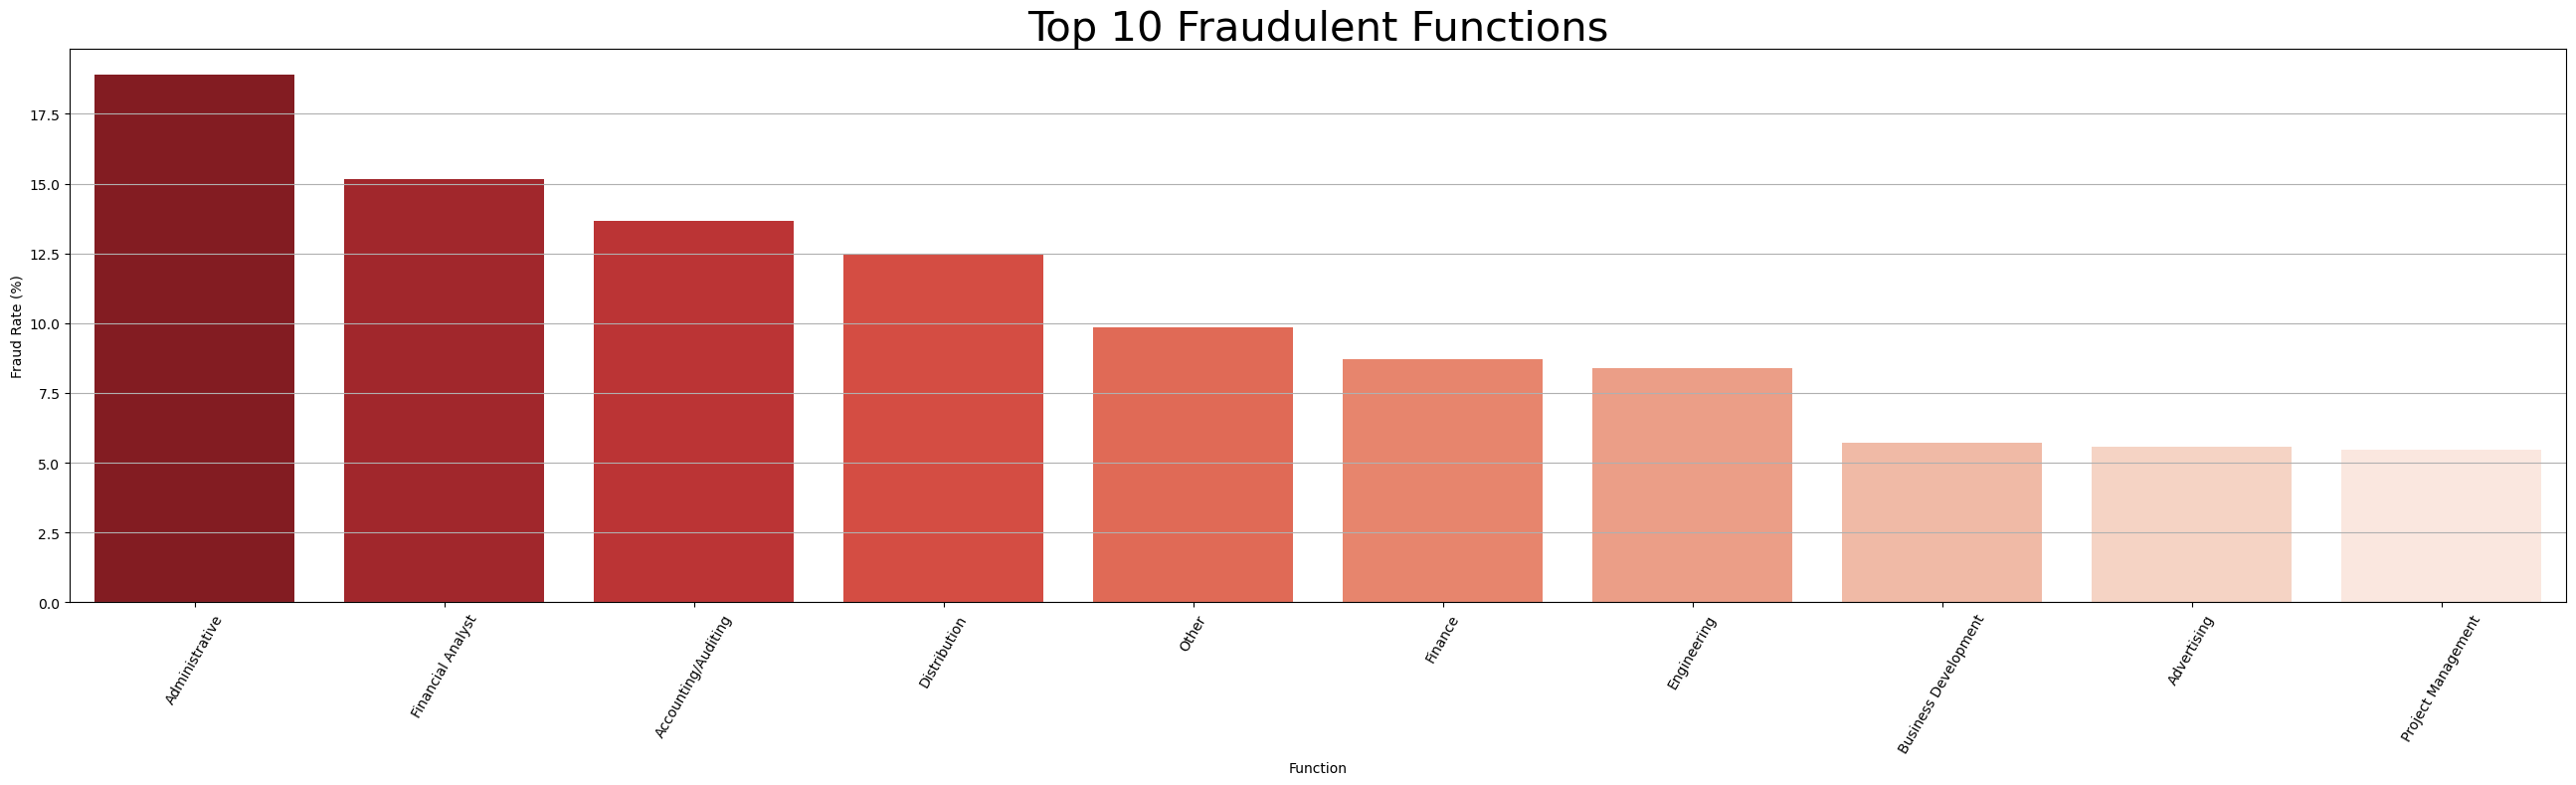

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image019.png


In [60]:
# visualise which job function has the highest rate of fraudulent postings

function_total = job_df['function'].value_counts()
print(f'List of top 10 job types:\n{function_total.head(10)}')

# count how many total job listings are fraudulent
fraud_by_function = job_df[job_df['fraudulent'] == 1]['function'].value_counts()

# create dataframe that calculates fraud rate 
fraud_rate_df = pd.DataFrame({'total': function_total,
                              'fraudulent': fraud_by_function
                             })
fraud_rate_df['fraudulent'] = fraud_rate_df['fraudulent'].fillna(0)

# calculate fraud rate
fraud_rate_df['fraud_rate'] = fraud_rate_df['fraudulent'] / fraud_rate_df['total'] * 100

# only show top 10 fraudulent functions 
top10_fraud = fraud_rate_df.sort_values('fraud_rate', ascending=False).head(10)
# plot fraud rate based on jobs function

plt.figure(figsize=(26, 8))
sns.barplot(data=top10_fraud.reset_index(),x='function', y='fraud_rate',
            hue='function', legend=False, palette='Reds_r')
plt.title('Top 10 Fraudulent Functions', size=30)
plt.xlabel('Function')
plt.ylabel('Fraud Rate (%)')
plt.grid(True, axis='y')
plt.xticks(rotation=60)
plt.tight_layout()
save_plot_function(19)

## Filter out non-english text

In [62]:
job_df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country
0,1,Marketing Intern,"US, NY, New York",Marketing,Unknown,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Unknown,0,1,0,Other,Internship,Unspecified,Unknown,Marketing,0,US
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,Unknown,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Unspecified,Marketing and Advertising,Customer Service,0,NZ
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Unknown,Unknown,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Unknown,0,1,0,Other,Not Applicable,Unspecified,Unknown,Unknown,0,US
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,Unknown,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US
4,5,Bill Review Manager,"US, FL, Fort Worth",Unknown,Unknown,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US


In [63]:
job_df['is_english'] = job_df['description'].apply(is_english)

In [64]:
language_counts = job_df['is_english'].value_counts()

In [65]:
print(language_counts)

is_english
True     17732
False      148
Name: count, dtype: int64


In [66]:
language_counts_df = language_counts.rename(index={True: 'English', False: 'Non-English'}).reset_index()
language_counts_df.columns = ['Language', 'Count']

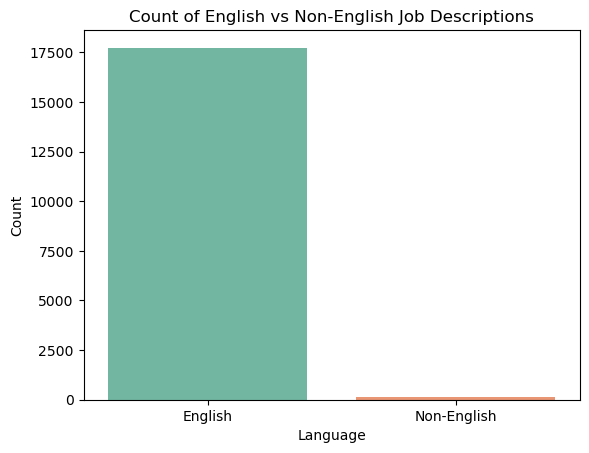

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image150.png


In [67]:
sns.barplot(data=language_counts_df, x='Language', y='Count', hue='Language', legend=False, palette='Set2')
plt.title('Count of English vs Non-English Job Descriptions')
save_plot_function(150)

## Inspect Non-English rows

In [69]:
# create dataframe for Greece rows to check whether all rows are not english
greek_rows = job_df[(job_df['country'] == 'GR') & (job_df['is_english'] == False)]

In [70]:
greek_rows[['title', 'department', 'company_profile', 'description', 'requirements', 'benefits','fraudulent']].head(53)

,title,department,company_profile,description,requirements,benefits,fraudulent
542,Key Account Manager,Sales,Optimal Business Action was created in 2005 in...,"Η Optimal Business Action, για λογαριασμό πελά...",-Πτυχίο Πολυτεχνείου (Μηχανολόγων/Ηλεκτρολόγων...,-Ελκυστικό πακέτο αποδοχών-Αυτοκίνητο-Εργασία ...,0
549,Programmer/ Analyst,ΠΛΗΡΟΦΟΡΙΚΗ,Unknown,Ανάπτυξη και Υποστήριξη ΕφαρμογώνΓνώσεις πληρ...,Επίπεδο &amp; Τίτλος Σπουδών: Πτυχίο ΑΕΙ ή ΤΕΙ...,Unknown,0
686,Employee for incoming department,Unknown,Welcome tailor made travel services is a trave...,"Η εταιρεία Welcome, tailor made travel service...",Άριστη γνώση της Αγγλικής γλώσσας (προφορικά κ...,"Η εταιρεία προσφέρει: μόνιμη εργασία, ευχάριστ...",0
935,Junior System Administrator,Unknown,Η HyperHosting είναι μία εταιρία που μπήκε δυν...,H HyperHosting από το 2001 παρέχει υπηρεσίες w...,Απαιτούμενα προσόντα:Άριστη γνώση λειτουργίας ...,Άμεση πρόσληψηΑνταγωνιστικές αποδοχέςΕργασία σ...,0
1557,Web Developer (Intern),Unknown,Το #URL_bb79581a561837ad604b8fc4ab629753b36407...,Το #URL_bb79581a561837ad604b8fc4ab629753b36407...,ΑπαιτούμεναΦοιτητής/Απόφοιτος ΑΕΙ ή ΤΕΙ Πληροφ...,ΠρονόμιαΣυμμετοχή σε μια ταχύτατα αναπτυσσόμεν...,0
1666,iOS Engineer,Engineering,Pinnatta is the world’s first interactive mult...,"To Pinnatta, μια από τις ταχύτερα αναπτυσσόμεν...","Εξαιρετικές γνώσεις iOSΠολύ καλές γνώσεις PHP,...",Ιδιαίτερα ανταγωνιστικό πακέτο αποδοχών και με...,0
1688,Senior PHP Web Developer,Technical,H WEDIA είναι μια ταχύτατα αναπτυσσόμενη ελλην...,"Μεγαλώνουμε την ομάδα μας,και χρειαζόμαστε ένα...",Πριν αποφασίσεις να μας στείλεις το βιογραφικό...,Πιστεύουμε ότι είμαστε από τις πιο δυναμικές ε...,0
1793,Web - Facebook developers,Digital,H HAVAS WW είναι ένα από τα μεγαλύτερα διαφημι...,&Eta;&nbsp;Havas&nbsp;Worldwide&nbsp;Digital&n...,&nbsp;Web - Facebook developers&Alpha;&pi;&alp...,&nbsp;&Pi;&lambda;ή&rho;&eta; &alpha;&pi;&alph...,0
1830,iOS / mobile developer,Unknown,Truckbird is a startup company aiming to disru...,Ποιοί είμαστε:Είμαστε μία startup εταιρεία που...,απαραίτητη προϋπόθεση είναι η γνώση γλώσσας πρ...,Την ευκαιρία να είναι κομμάτι μίας startup ετα...,0
1921,Developer,Unknown,Unknown,Ονομάζομαι Καμπανός Νίκος είμαι απόφοιτος του ...,- Ομαδικότητα- Όρεξη για δουλειάΟι παραπάνω δε...,- Code Igniter- Bootstrap- Android Developing ...,0


In [71]:
# create function to detect language to keep only english textual listings
def detect_language(text):
    try:
        return detect(text)
    except:
        return 'error'

In [72]:
# create language column to identify english text
job_df['detected_lang'] = job_df['description'].apply(detect_language)

In [73]:
# filter only english rows
job_df = job_df[job_df['detected_lang'] == 'en']

In [74]:
# drop detected_lang column
job_df = job_df.drop(columns=['detected_lang'])

In [75]:
print(len(job_df))

17731


## Create Path to Feature Engineering Notebook

In [77]:
# Set path
filepath = Path(r'C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\data\cleaned_df_eda_01.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
job_df.to_csv(filepath, index=False)